# Basic installs

In [2]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_aer

# Notes

* This is a non-editable file. To be able to edit it, please download it and upload your local copy to Google Colab.

* This is the only document that you will submit with your solutions. For each task, the cell should **output** (print or plot) **what is asked in bold, and nothing more**.

* **Task 3 is open-ended**, and the primary criterion for evaluation. However, we recommend that participants go through the tasks in order, as understanding tasks 1 and 2 is fundamental for task 3. **Tasks 1 and 2 are independent from each other.**

* You can create and reuse as many functions as you want. You can also install any packages available through `!pip install ...`, with the exception of quantum computing packages apart from Qiskit. **These tasks are to be solved using Qiskit.**

 * The final submission file **must include the cell outputs** you obtained, but we will re-run them to make sure they correspond to the code as written.

 * Notebooks missing installs/imports/definitions required to execute the cells without errors will be automatically disqualified. Before downlowading this file for submission, please **click "Runtime > Disconnect and delete runtime" followed by "Run all" to make sure the execution runs smoothly**. Better yet, do this occasionally to catch any bugs related to pre-defined variables.

* For the full rules, refer to [the hackathon website](https://sites.google.com/vt.edu/hackathon/rules).

# Task 1

##**1a)**

Create a one-qubit circuit with no gates or measurements. Calculate and **print the exact the expectation value of the Pauli X** operator in this circuit. You should use tools from `qiskit.quantum_info`.

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, SparsePauliOp

# |ψ> = |0>
qc = QuantumCircuit(1) 

# Pauli X matrix
X = SparsePauliOp.from_list([("X", 1.0)])

# <ψ|X|ψ> 
psi = Statevector.from_instruction(qc)
expX = psi.expectation_value(X).real
print("⟨X⟩ =", expX)

⟨X⟩ = 0.0


##**1b)**

Repeat task **1a**, with the restriction that the final result must be obtained by calculating the expectation value of the Pauli Z operator in the circuit. You must still **print the expectation value of Pauli X**.

*Hint: You can use additional circuit gates.*

In [4]:
# X|ψ> = HZH|ψ> => X|0> = HZH|0> = HZ|+> = H|-> = |1>

# |ψ> = |0>
qc = QuantumCircuit(1) 

# H|ψ> = H|0> = |+>
qc.h(0)

# Pauli Z matrix
Z = SparsePauliOp.from_list([("Z", 1.0)])

# <ψ|HZH|ψ> = <ψ|X|ψ>
psi = Statevector.from_instruction(qc)
expX = psi.expectation_value(Z).real
print("⟨X⟩ =", expX)

⟨X⟩ = 0.0


## **1c)**

Add an RY gate (rotation about the Y axis) as the first gate in the circuit you used for task **1b**. The rotation angle should be $\frac{\pi}{4}$. Recalculate and **print the expectation value of Pauli X**.

In [5]:
from math import pi
qc = QuantumCircuit(1) 
qc.ry(pi/4,0)
qc.h(0)

Z = SparsePauliOp.from_list([("Z", 1.0)])
psi = Statevector.from_instruction(qc)
expX = psi.expectation_value(Z).real
print("⟨X⟩ =", expX)

⟨X⟩ = 0.7071067811865472


## **1d)**

Write a function `get_x_exp_value` that calculates the expectation value of X in a circuit with a Y rotation gate. The rotation angle should be an argument of the function. **Print the output of `get_x_exp_value`$(\frac{\pi}{4})$**.

In [ ]:
def get_x_exp_value(theta):
    qc = QuantumCircuit(1)
    qc.ry(theta, 0) 
    qc.x(0)               
    psi = Statevector.from_instruction(qc)
    X = SparsePauliOp.from_list([("X", 1.0)])
    return psi.expectation_value(X).real

print(get_x_exp_value(pi/4)) 

0.7071067811865476


## **1e)**

Use the function you wrote to obtain the **maximum** expectation value of Pauli X across any circuit with a Y rotation gate. You should perform an optimization over the rotation angle using `scipy.optimize`. Obtain the results for at least 2 different optimizers and 3 different initial parameter values in each case. For each case, **print the maximum value and the corresponding rotation angle**, for a total of 6 numbers. The print statement should make it clear which optimizer and initial parameter value was used in each case.

In [20]:
import numpy as np
from scipy.optimize import minimize

X = SparsePauliOp.from_list([("X", 1.0)])

def wrap_0_2pi(x: float) -> float:
    return float(np.mod(x, 2*pi))

def objective(t):
    return -get_x_exp_value(float(t[0]))

inits = [0.0, 1.0, 4.0]               
methods = ["Nelder-Mead", "Powell"]  

for method in methods:
    for x0 in inits:
        res = minimize(objective, x0=np.array([x0]), method=method)
        theta_opt = wrap_0_2pi(res.x[0])
        max_val = get_x_exp_value(res.x[0])
        print(f"{method}, init={x0:.1f} rad -> max ⟨X⟩={max_val:.1f}, θ={theta_opt:.9f} rad")


Nelder-Mead, init=0.0 rad -> max ⟨X⟩=1.0, θ=1.570812500 rad
Nelder-Mead, init=1.0 rad -> max ⟨X⟩=1.0, θ=1.570800781 rad
Nelder-Mead, init=4.0 rad -> max ⟨X⟩=1.0, θ=1.570800781 rad
Powell, init=0.0 rad -> max ⟨X⟩=1.0, θ=1.570796332 rad
Powell, init=1.0 rad -> max ⟨X⟩=1.0, θ=1.570796327 rad
Powell, init=4.0 rad -> max ⟨X⟩=1.0, θ=1.570796324 rad


## **1f)**

Rewrite your answer to task **1b**, now simulating circuit measurements using `AerSimulator`. Run the circuit 100 times. **Print the number of times 0 is measured, and the number of times 1 is measured**.

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

shots = 100

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

sim = AerSimulator()
res = sim.run(transpile(qc, sim), shots=100).result()
counts = res.get_counts()

c0_f = counts.get('0', 0)
c1_f = counts.get('1', 0)

print("Number of times 0 measured:",c0_f)
print("Number of times 0 measured:",c1_f)

Number of times 0 measured: 51
Number of times 0 measured: 49


## **1g)**

Rewrite your answer to task **1c**, now simulating circuit measurements. Run the circuit 100 times. **Print the number of times 0 is measured, and the number of times 1 is measured**.

In [9]:
from math import pi
qc = QuantumCircuit(1,1) 
qc.ry(pi/4,0)
qc.h(0)
qc.measure(0, 0)

sim = AerSimulator()
res = sim.run(transpile(qc, sim), shots=100).result()
counts = res.get_counts()

c0_g = counts.get('0', 0)
c1_g = counts.get('1', 0)

print("Number of times 0 measured:",c0_g)
print("Number of times 0 measured:",c1_g)

Number of times 0 measured: 89
Number of times 0 measured: 11


## **1h)**

Use the samples you obtained in **1f** and **1g** to calculate the expectation value of Pauli X in the circuits. **Print the expectation value for each case.** The print statement should make it clear which value corresponds to which circuit.

*Hint: What happens when you apply a Pauli Z gate to states |0> and |1>? You can find out using Qiskit circuits or matrix algebra. Once you know the answer, you can calculate the expectation value using a weighed average.*

In [10]:
expX_f = ((+1)*c0_f+(-1)*c1_f)/shots
expX_g = ((+1)*c0_g+(-1)*c1_g)/shots

print("<X> from question (1f):",expX_f)
print("<X> from question (1g):",expX_g)

<X> from question (1f): 0.02
<X> from question (1g): 0.78


## **1i)**

Run the calculations you did for **1f**, **1g** and **1h** ten times (for each circuit). **For each of the two circuits, print the expectation value, the standard deviation, and the average error with respect to the exact expectation values you calculated in 1b and 1c.** The print statement should make it clear what each number corresponds to.

In [11]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from math import pi
import numpy as np

def expX_exact(theta):
    qc = QuantumCircuit(1) 
    qc.ry(theta,0)
    qc.h(0)

    Z = SparsePauliOp.from_list([("Z", 1.0)])
    psi = Statevector.from_instruction(qc)
    expX = psi.expectation_value(Z).real
    return expX

def expX(theta,shots):
    qc = QuantumCircuit(1, 1)
    qc.ry(theta,0)
    qc.h(0)
    qc.measure(0, 0)

    sim = AerSimulator()
    res = sim.run(transpile(qc, sim), shots=shots).result()
    counts = res.get_counts()

    c0 = counts.get('0', 0)
    c1 = counts.get('1', 0)

    expX = ((+1)*c0+(-1)*c1)/shots
    return expX

expX_f_exact = expX_exact(0)
expX_g_exact = expX_exact(pi/4)
expX_f_arr = []
expX_g_arr = []
for i in range(10):
    expX_f_arr.append(expX(0,100))
    expX_g_arr.append(expX(pi/4,100))

expX_f = np.mean(expX_f_arr)
std_f = np.std(expX_f_arr)
err_f = np.mean(expX_f_arr-expX_f_exact)

expX_g = np.mean(expX_g_arr)
std_g = np.std(expX_g_arr)
err_g = np.mean(expX_g_arr-expX_g_exact)


print(f"for 1f: Avg<X> = {expX_f:.8f}, Standard Deviation = {std_f:.8f}, Average Error = {err_f:.8f}")
print(f"for 1g: Avg<X> = {expX_g:.8f}, Standard Deviation = {std_g:.8f}, Average Error = {err_g:.8f}")

for 1f: Avg<X> = 0.05400000, Standard Deviation = 0.08720092, Average Error = 0.05400000
for 1g: Avg<X> = 0.73000000, Standard Deviation = 0.03714835, Average Error = 0.02289322


## **1j)**

Increase the number of circuit executions from $100$ to $10^7$. Again, run the code ten times for each circuit. As in **1i**, **for each of the two cases, print the average expectation value, the standard deviation, and the average error with respect to the exact expectation values you calculated in 1b and 1c.** The print statement should make it clear what each number corresponds to.

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from math import pi
import numpy as np

expX_f_exact = expX_exact(0)
expX_g_exact = expX_exact(pi/4)
expX_f_arr = []
expX_g_arr = []
for i in range(10):
    expX_f_arr.append(expX(0,10_000))
    expX_g_arr.append(expX(pi/4,10_000))

expX_f = np.mean(expX_f_arr)
std_f = np.std(expX_f_arr)
err_f = np.mean(expX_f_arr-expX_f_exact)

expX_g = np.mean(expX_g_arr)
std_g = np.std(expX_g_arr)
err_g = np.mean(expX_g_arr-expX_g_exact)


print(f"for 1f: Avg<X> = {expX_f:.8f}, Standard Deviation = {std_f:.8f}, Average Error = {err_f:.8f}")
print(f"for 1g: Avg<X> = {expX_g:.8f}, Standard Deviation = {std_g:.8f}, Average Error = {err_g:.8f}")

for 1f: Avg<X> = -0.00224000, Standard Deviation = 0.00914759, Average Error = -0.00224000
for 1g: Avg<X> = 0.70700000, Standard Deviation = 0.00511625, Average Error = -0.00010678


## **1k)**

Write a function `sample_x_exp_value` similar to `get_x_exp_value` in task **1d**, but which uses measurements instead of exact expectation values. The number of circuit executions should be a `kwarg` named `executions`, with default value $10^3$. **Print the output of `sample_x_exp_value`$(\frac{\pi}{4})$**.

In [29]:
def sample_x_exp_value(theta,kwarg=1000):
    qc = QuantumCircuit(1, 1)
    qc.ry(theta,0)
    qc.h(0)
    qc.measure(0, 0)

    sim = AerSimulator()
    res = sim.run(transpile(qc, sim), shots=kwarg).result()
    counts = res.get_counts()

    c0 = counts.get('0', 0)
    c1 = counts.get('1', 0)

    expX = ((+1)*c0+(-1)*c1)/kwarg
    return expX

print(get_x_exp_value(pi/4)) 

0.7071067811865476


## **1l)**

As you did for task **1e**, use the function you wrote to obtain the **maximum** expectation value of Pauli X across any circuit with a Y rotation gate. Let the number of circuit executions take the default value. Obtain the results for at least 2 different optimizers and 3 different initial parameter values in each case. For each case, **print the maximum value and the corresponding rotation angle**, for a total of 6 values.

In [ ]:
import numpy as np
from scipy.optimize import minimize

def wrap_0_2pi(x: float) -> float:
    return float(np.mod(x, 2*pi))

def objective(t):
    return -sample_x_exp_value(float(t[0]))

inits = [0.0, 1.0, 4.0]               
methods = ["Nelder-Mead", "Powell"]  

for method in methods:
    for x0 in inits:
        res = minimize(objective, x0=np.array([x0]), method=method)
        theta_opt = wrap_0_2pi(res.x[0])
        max_val = sample_x_exp_value(res.x[0])
        print(f"{method}, init={x0:.1f} rad -> max ⟨X⟩={max_val:.1f}, θ={theta_opt:.9f} rad")

Nelder-Mead, init=0.0 rad -> max ⟨X⟩=0.0, θ=0.000218750 rad
Nelder-Mead, init=1.0 rad -> max ⟨X⟩=1.0, θ=1.550000000 rad
Nelder-Mead, init=4.0 rad -> max ⟨X⟩=1.0, θ=1.600000000 rad
Powell, init=0.0 rad -> max ⟨X⟩=1.0, θ=1.558230535 rad
Powell, init=1.0 rad -> max ⟨X⟩=1.0, θ=1.578223719 rad
Powell, init=4.0 rad -> max ⟨X⟩=1.0, θ=1.523476868 rad


## **1m)**

Repeat **1l** with the `executions` kwarg set to $10$ and $10^5$ instead of $10^3$. For each case, **print the maximum value and the corresponding rotation angle**, for a total of 6 values for each value of `executions`.

In [ ]:
import numpy as np
from scipy.optimize import minimize

def wrap_0_2pi(x: float) -> float:
    return float(np.mod(x, 2*pi))

def objective(t):
    return -sample_x_exp_value(float(t[0]),100_000)

inits = [0.0, 1.0, 4.0]               
methods = ["Nelder-Mead", "Powell"]  

for method in methods:
    for x0 in inits:
        res = minimize(objective, x0=np.array([x0]), method=method)
        theta_opt = wrap_0_2pi(res.x[0])
        max_val = sample_x_exp_value(res.x[0])
        print(f"{method}, init={x0:.1f} rad -> max ⟨X⟩={max_val:.1f}, θ={theta_opt:.9f} rad")

## **1n)**

Create the following circuit and **print it using `circuit.draw('mpl')`**.

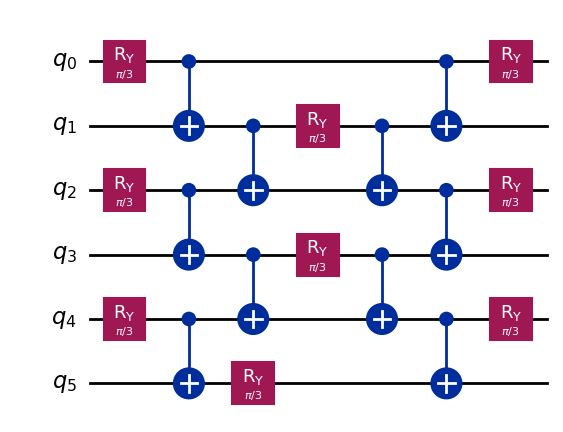

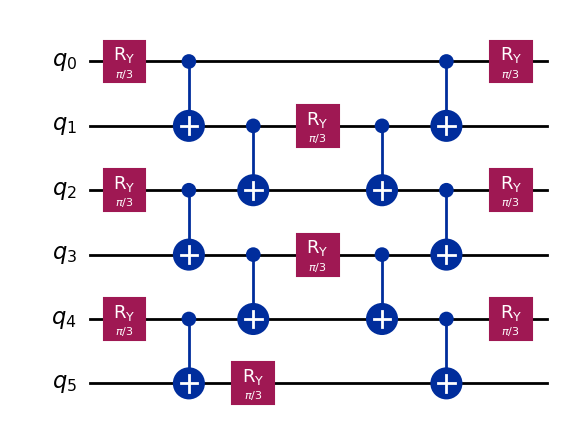

In [52]:
from math import pi

qc = QuantumCircuit(6)

qc = QuantumCircuit(6)
qc.ry(pi/3, [0, 2, 4])
qc.cx(0, 1); qc.cx(2, 3); qc.cx(4, 5)
qc.cx(1, 2); qc.cx(3, 4); qc.ry(pi/3, 5)
qc.ry(pi/3, [1, 3])
qc.cx(1, 2); qc.cx(3, 4)
qc.cx(0, 1); qc.cx(2, 3); qc.cx(4, 5)
qc.ry(pi/3, [0, 2, 4])

qc.draw("mpl")

## **1o)**

Consider the following parameterized circuit. Define it in `Qiskit` and optimize the parameters to maximize the squared overlap with the circuit you created in task **1n**. You may choose the optimizer and starting point as you wish. You may also create larger parameterized circuits by repeating this unit layer (increasing the number of parameters). **Print the highest squared overlap you are able to obtain.**

*Hint: you can calculate the squared overlap between two statevectors as the square of the absolute value of their inner product.*

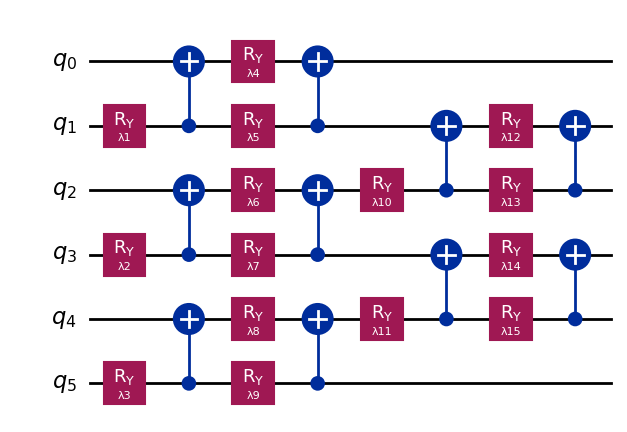

In [62]:
def build_target_circuit():
    qc = QuantumCircuit(6)
    qc.ry(pi/3, [0, 2, 4])
    qc.cx(0, 1); qc.cx(2, 3); qc.cx(4, 5)
    qc.cx(1, 2); qc.cx(3, 4); qc.ry(pi/3, 5)
    qc.ry(pi/3, [1, 3])
    qc.cx(1, 2); qc.cx(3, 4)
    qc.cx(0, 1); qc.cx(2, 3); qc.cx(4, 5)
    qc.ry(pi/3, [0, 2, 4])
    return qc

def build_param_circuit(thetas):
    qc = QuantumCircuit(6)
    qc.ry(thetas[0], 0); qc.ry(thetas[1], 2); qc.ry(thetas[2], 4)
    qc.cx(0, 1); qc.cx(2, 3); qc.cx(4, 5)
    qc.cx(1, 2); qc.cx(3, 4); qc.ry(thetas[3], 5)
    qc.ry(thetas[4], 1); qc.ry(thetas[5], 3)
    qc.cx(1, 2); qc.cx(3, 4)
    qc.cx(0, 1); qc.cx(2, 3); qc.cx(4, 5)
    qc.ry(thetas[6], 0); qc.ry(thetas[7], 2); qc.ry(thetas[8], 4)
    return qc


target = Statevector.from_instruction(build_target_circuit())
def overlap_sq(thetas):
    psi = Statevector.from_instruction(build_param_circuit(thetas))
    ov = np.vdot(target.data, psi.data)  # <target|psi>
    return float(np.abs(ov)**2)

# Simple coordinate-ascent search
def maximize_overlap(num_iters=10, delta_init=1.0, seed=0,deltaScaleForFiner=0.6):
    rng = np.random.default_rng(seed)
    starts = [
        np.zeros(9),                                  # all zeros
        np.full(9, pi/3),                             # near the known target parameters
        rng.uniform(-pi, pi, size=9),                 # random 1
        rng.uniform(-pi, pi, size=9),                 # random 2
        rng.uniform(-pi, pi, size=9),                 # random 3
    ]
    best_val = -1.0
    for x0 in starts:
        x = x0.copy()
        delta = delta_init
        for _ in range(num_iters):
            for i in range(9):
                base = overlap_sq(x)
                x[i] += delta
                f_plus = overlap_sq(x)
                x[i] -= 2*delta
                f_minus = overlap_sq(x)

                if f_plus >= base and f_plus >= f_minus:
                    x[i] += 2*delta 
                elif f_minus >= base and f_minus >= f_plus:
                    pass # already at -delta
                else:
                    x[i] += delta # revert to base
            delta *= deltaScaleForFiner
        best_val = max(best_val, overlap_sq(x))
    return best_val

best = maximize_overlap()
print("Best Square Overlap:",best)


Best Square Overlap: 1.0


# Task 2

## **2a)**

Create a 3 qubit circuit and apply the Hadamard transform as shown below. Run the circuit using `Aersimulator` and **print the statevector states and coefficients**. Generalize the code to an $n$-qubit circuit and test different numbers of qubits. What happens? Discuss the result with your team.

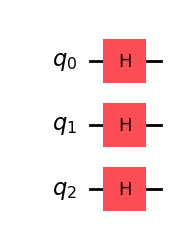

In [128]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np

def hadamard_on_all(n: int):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.save_statevector("psi")

    sim = AerSimulator(method="statevector")
    sv = sim.run(transpile(qc, sim)).result().data(0)["psi"]

    for i in range(2**n):
        bit = format(i, f"0{n}b")
        amp  = sv[i]
        print(f"|{bit}> : {amp.real:+.8f}{amp.imag:+.8f}j  (p={abs(amp)**2:.6f})")
    return qc,np.asarray(sv)
   
qc,sv = hadamard_on_all(3)

|000> : +0.35355339+0.00000000j  (p=0.125000)
|001> : +0.35355339+0.00000000j  (p=0.125000)
|010> : +0.35355339+0.00000000j  (p=0.125000)
|011> : +0.35355339+0.00000000j  (p=0.125000)
|100> : +0.35355339+0.00000000j  (p=0.125000)
|101> : +0.35355339+0.00000000j  (p=0.125000)
|110> : +0.35355339+0.00000000j  (p=0.125000)
|111> : +0.35355339+0.00000000j  (p=0.125000)


## **2b)**  

Consider a single qubit. We want a circuit that reflects the |0> state (adding a minus sign, $-$|0>) and leaves |1> unchanged. Create this circuit using any sequence of Pauli gates (X, Y, Z). Test your solution by applying it after the Hadamard transform and seeing the statevector coefficients. **Draw the circuit.**

Statevector([-1.+0.j,  0.+0.j],
            dims=(2,))
|0> : -0.70710678+0.00000000j  (p=0.500000)
|1> : +0.70710678+0.00000000j  (p=0.500000)


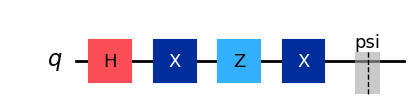

In [166]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np

qc = QuantumCircuit(1)
qc.x(0)
qc.z(0)
qc.x(0)
psi = Statevector.from_instruction(qc)
print(psi)

# test
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.compose(qc, inplace=True)
qc1.save_statevector("psi")
sim = AerSimulator(method="statevector")
sv = sim.run(transpile(qc1,sim)).result().data(0)["psi"]

for i in range(2**1):
    bit = format(i, f"0{1}b")
    amp  = sv[i]
    print(f"|{bit}> : {amp.real:+.8f}{amp.imag:+.8f}j  (p={abs(amp)**2:.6f})")

qc1.draw("mpl")


## **2c)**  

Generalize the zero-reflection operator to $2$ qubits, then to $n$ qubits. **Draw the circuit for n=6.**


Zero Reflection:
|00> : -1.00000000-0.00000000j  (p=1.000000)
|01> : +0.00000000+0.00000000j  (p=0.000000)
|10> : +0.00000000-0.00000000j  (p=0.000000)
|11> : +0.00000000+0.00000000j  (p=0.000000)

Zero Reflection Test with Hadamard:
|00> : -0.50000000+0.00000000j  (p=0.250000)
|01> : +0.50000000+0.00000000j  (p=0.250000)
|10> : +0.50000000+0.00000000j  (p=0.250000)
|11> : +0.50000000+0.00000000j  (p=0.250000)


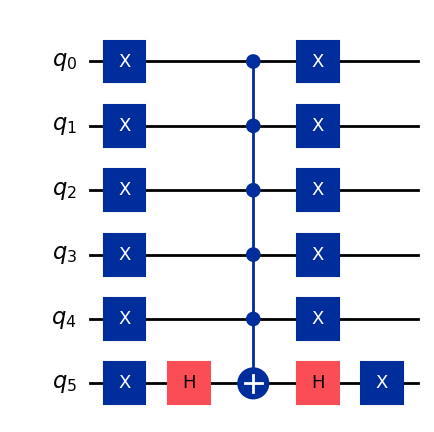

In [290]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import MCXGate
import numpy as np


def print_state_coeff(qc,n,stateVar):
    sim = AerSimulator(method="statevector")
    sv = sim.run(transpile(qc,sim)).result().data(0)[stateVar]

    for i in range(2**n):
        bit = format(i, f"0{n}b")
        amp  = sv[i]
        print(f"|{bit}> : {amp.real:+.8f}{amp.imag:+.8f}j  (p={abs(amp)**2:.6f})")

def zero_reflection(n:int):
    qc = QuantumCircuit(n)
    bits = range(n)
    if n == 1:
        qc.x(bits);qc.z(bits);qc.x(bits)
    else:
        qc.x(bits)
        qc.h(n-1)
        qc.append(MCXGate(n-1), list(bits))
        qc.h(n-1)
        qc.x(bits) 
    return qc

def test_zero_reflection(n:int):
    print("\nZero Reflection:")
    ref0_qc = zero_reflection(n)
    ref0_qc.save_statevector("psi")
    print_state_coeff(ref0_qc,n,"psi")

    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.compose(ref0_qc, inplace=True)
    qc.save_statevector("psi1")
    print("\nZero Reflection Test with Hadamard:")
    print_state_coeff(qc,n,"psi1")

test_zero_reflection(2)
qc = zero_reflection(6)
qc.draw("mpl")

## **2d)**  

 Now we want to reflect an arbitrary state, initialized by a given operator $A$. Consider this operator to be the Hadamard transform (you can convert it to a gate using the `to_gate(label="A")` instruction on the circuit). Implement the reflection circuit for arbitrary $n$. **Draw the circuit for $n=6$.**

 _Hint: Reuse the operator you defined in **2c**._


Zero Reflection Test with Hadamard Gate:
|00> : +0.50000000+0.00000000j  (p=0.250000)
|01> : -0.50000000-0.00000000j  (p=0.250000)
|10> : -0.50000000-0.00000000j  (p=0.250000)
|11> : -0.50000000-0.00000000j  (p=0.250000)


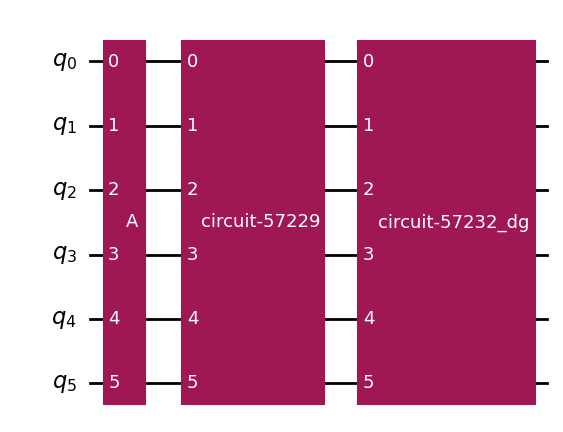

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import MCXGate
import numpy as np

def zero_reflection_gate(n:int):
    qc = QuantumCircuit(n)
    bits = range(n)
    if n == 1:
        qc.x(bits);qc.z(bits);qc.x(bits)
    else:
        qc.x(bits)
        qc.h(n-1)
        qc.append(MCXGate(n-1), list(bits))
        qc.h(n-1)
        qc.x(bits) 
    return qc.to_gate(label="R0")

def A_gate(n: int):
    A = QuantumCircuit(n)
    A.h(range(n))
    return A.to_gate(label="A")

def zero_reflection_for_arbitrary(n:int):
    qc = QuantumCircuit(n)
    qc.append(A_gate(n), range(n))
    qc.append(zero_reflection(n), range(n))
    
    return qc
    
def print_state_coeff(qc,n,stateVar):
    sim = AerSimulator(method="statevector")
    sv = sim.run(transpile(qc,sim)).result().data(0)[stateVar]

    for i in range(2**n):
        bit = format(i, f"0{n}b")
        amp  = sv[i]
        print(f"|{bit}> : {amp.real:+.8f}{amp.imag:+.8f}j  (p={abs(amp)**2:.6f})")


def test_zero_reflection(n:int):
    qc = zero_reflection_for_arbitrary(n)
    qc.save_statevector("psi")

    print("\nZero Reflection Test with Hadamard Gate:")
    print_state_coeff(qc,n,"psi")
    return qc

test_zero_reflection(2)
zero_reflection_for_arbitrary(6).draw("mpl")

## **2e)**  

Consider the state `w='010101...'` (alternating between 0 and 1) for arbitrary lengths. Build a circuit that reflects this state (and leaves all others unchanged) for arbitrary $n$. We'll call this circuit *the oracle*. **Draw it for $n=3$ and print the statevector coefficients.**

|000> : +1.00000000+0.00000000j  (p=1.000000)
|001> : +0.00000000+0.00000000j  (p=0.000000)
|010> : +0.00000000+0.00000000j  (p=0.000000)
|011> : +0.00000000+0.00000000j  (p=0.000000)
|100> : +0.00000000-0.00000000j  (p=0.000000)
|101> : +0.00000000+0.00000000j  (p=0.000000)
|110> : +0.00000000+0.00000000j  (p=0.000000)
|111> : +0.00000000+0.00000000j  (p=0.000000)


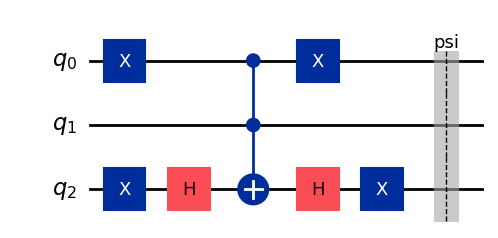

In [369]:
def oracle(n):
    w_bits = [(i % 2) for i in range(n)]
    qc = QuantumCircuit(n)
    zeros = [i for i, b in enumerate(w_bits) if b == 0]
    if zeros:
        qc.x(zeros)

    if n == 1:
        qc.x(0);qc.z(0);qc.x(0) #for w=1 reflect |0>
    else:
        qc.h(n-1)
        qc.append(MCXGate(n-1), list(range(n)))
        qc.h(n-1)

    if zeros:
        qc.x(zeros)
    return qc

qc = oracle(3)
qc.save_statevector("psi")
print_state_coeff(qc,3,"psi")
qc.draw("mpl")


## **2f)**  

Build an operator consisting of the sequential application of the oracle and the reflection-of-$A$ operator, by this order, with $A$ as defined previously. Create a function that given $A$, the oracle, and an integer `m`, returns a circuit that applies $A$, followed by `m` repetitions of the operator you just created. Test this circuit for $A$ and the oracle defined previously, and increasing ms: `m = [0, 1, 2, 3, 4, ..., 20]`. **Plot the final amplitude (statevector coefficient) of `w`** (as defined in **2e**) **as a function of `m`.**

_Suggestion: Do this using an auxiliary function `get_data(A, oracle, ms)` that returns `xs`, a list of the data in correspondence with `ms` (in this case, the `xs` are amplitudes)._

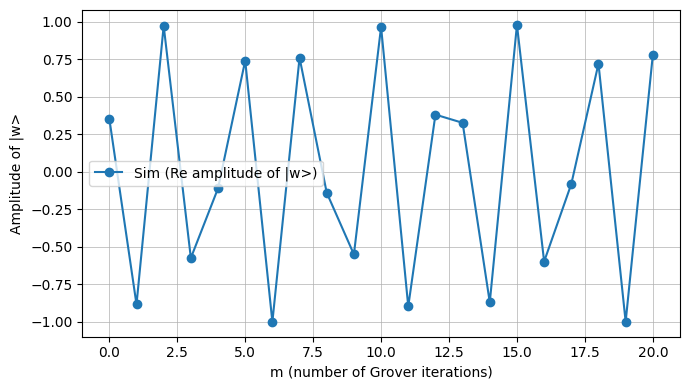

In [489]:
import matplotlib.pyplot as plt

def index_of_bits(bits):
    idx = 0
    for j, b in enumerate(bits):
        idx |= (b & 1) << j
    return idx

def oracle_gate(n):
    return oracle(n).to_gate(label="OR")

def A_gate(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    return qc.to_gate(label="A")

def reflect_about_A_gate(A_gate):
    n = A_gate.num_qubits
    qc = QuantumCircuit(n)
    qc.append(A_gate, range(n))
    qc.append(zero_reflection_gate(n), range(n))
    try:
        qc.append(A_gate.inverse(), range(n))  
    except Exception:
        qc.append(A_gate, range(n))            
    return qc.to_gate(label="R")

def mRepetitionsCircuit(A, oracle,m:int):
    n = A.num_qubits
    step = QuantumCircuit(n, name="G=O·Rpsi")
    step.append(oracle, range(n))
    step.append(reflect_about_A_gate(A), range(n))
    G = step.to_gate(label="G")
    
    qc = QuantumCircuit(n)
    qc.append(A,range(n))
    for _ in range(m):
        qc.append(G, range(n))
    return qc


def amplitude_of(A, oracle,index,m:int):
    qc = mRepetitionsCircuit(A,oracle,m)
    qc.save_statevector("psi")
    sim = AerSimulator(method="statevector")
    sv = sim.run(transpile(qc,sim)).result().data(0)["psi"].data
    return sv[index]

def get_data(A , oracle, ms):
    w_bits = [(i % 2) for i in range(n)]
    xs = []
    for m in ms:
        index = index_of_bits(w_bits)
        amp = amplitude_of(A,oracle,index,m)
        xs.append(amp)
    return xs

n = 3
A = A_gate(n)
Ow = oracle_gate(n)
ms = list(range(0, 21))  

amps = get_data(A, Ow, ms) 

plt.figure(figsize=(7,4))
plt.plot(ms, [a.real for a in amps], marker='o', label='Sim (Re amplitude of |w>)')
plt.xlabel('m (number of Grover iterations)')
plt.ylabel('Amplitude of |w>')
plt.grid(True, which='both', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

    

## **2g)**  

Add the reference $A(m) = \sin\big((2m+1)*\arcsin(\sqrt{p_\text{true}})\big)$, where $p_\text{true}=1/2^n$ and $n$ is the number of qubits, to the previous plot. **Plot the points of 2f along with this curve.**

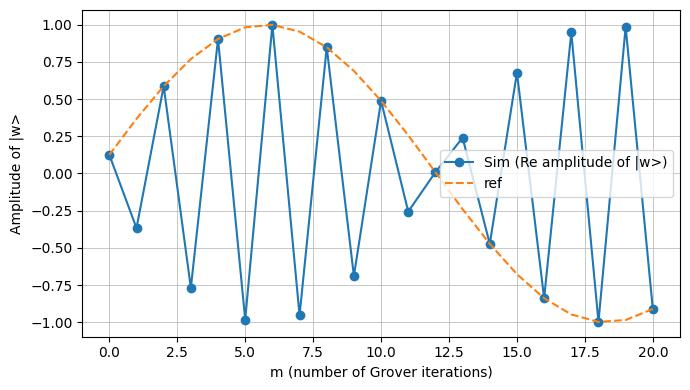

In [490]:
n = 6
A = A_gate(n)
Ow = oracle_gate(n)
ms = list(range(0, 21))  

p_true = 1/(2**n)
ref_amp = [np.sin((2*m + 1)*np.arcsin(np.sqrt(p_true))) for m in ms]
amps = get_data(A, Ow, ms) 

plt.figure(figsize=(7,4))
plt.plot(ms, [a.real for a in amps], marker='o', label='Sim (Re amplitude of |w>)')
plt.plot(ms, ref_amp, linestyle='--', label='ref')
plt.xlabel('m (number of Grover iterations)')
plt.ylabel('Amplitude of |w>')
plt.grid(True, which='both', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## **2f)**  

Build an operator consisting of the sequential application of the oracle and the reflection-of-$A$ operator, by this order, with $A$ as defined previously. Create a function that given $A$, the oracle, and an integer `m`, returns a circuit that applies $A$, followed by `m` repetitions of the operator you just created. Test this circuit for $A$ and the oracle defined previously, and increasing ms: `m = [0, 1, 2, 3, 4, ..., 20]`. **Plot the final amplitude (statevector coefficient) of `w`** (as defined in **2e**) **as a function of `m`.**

_Suggestion: Do this using an auxiliary function `get_data(A, oracle, ms)` that returns `xs`, a list of the data in correspondence with `ms` (in this case, the `xs` are amplitudes)._

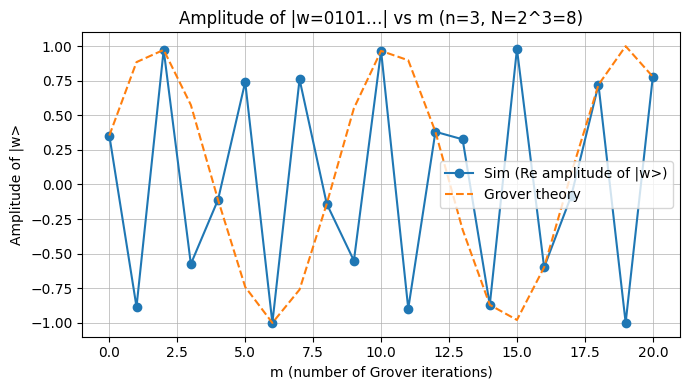

m= 0  amp(|w>) = +0.353553
m= 1  amp(|w>) = -0.883883
m= 2  amp(|w>) = +0.972272
m= 3  amp(|w>) = -0.574524
m= 4  amp(|w>) = -0.110485
m= 5  amp(|w>) = +0.740252


## **2h)**  

Repeat the plot of **2f**, but change the following: run the circuits using the Aer simulator with 1024 shots, and **plot the number of times `w` was measured as a function of `m`, using $\text{Nshots}*P(m)$ as a reference, with $P(m)=A(m)^2$.**

_Suggestion: Do this by modifying the `get_data` function to accept an optional argument `Nshots`, and return a list of integers (numbers of times `w` was measured)._

## **2i)**  

Consider the parameter $p$, defined as the probability of measuring `w` after applying $A$, which you should think of as an unknown (although in this case we know it to be $1/2^n$, as follows from the operators we constructed).

Given an `m` and an `x` (number of times `w` was the measurement outcome), you can now calculate the likelihood $L$ (probability of generating the datum) for any $p \in [0,1]$ using the square of the sine function from **2g**. E.g., for a single shot measurement, $L(p \mid m, x=1) = \sin\big((2m+1)*\arcsin(\sqrt{p})\big)^2$, and $L(p \mid m, x=0)$ is its complement.

Generalize this calculation for a dataset (`ms`, `xs`), using the multiplication rule for joint probabilities of independent events. Collect data for `ms = [0, 1, 2, 3, 4, 5]` with $100$ shots each using the `get_data` function from before, and **plot the likelihood as a function of $p$.** Mark the real value with a dashed vertical bar as a reference.



## **2j)**  

Consider the task of estimating $p$ from data. We can do this by maximizing the likelihood. Create a function `maximize_likelihood(ms, xs, Nshots)` that does this, using an optimization function from `scipy.optimize`. Test this function for the data of **2i**, and **print the value of $p$ that maximizes its value**.

## **2k)**   

Now we want to consider how the error (absolute deviation from the true value $p_t$) evolves with the cost, defined as the number of calls to the $A$ operator, $N=2m+1$. **Plot the error as a function of $N$ in a log-log scale**, by using the strategy of **2j** to produce incremental estimates on cumulative datasets: `ms=[0]`, then `ms=[0,1]`, ..., until `ms=[0,...,mmax]`. Use `mmaxx = 15`.

## **2l)**  

The results are affected by statistical noise. To reduce this effect, consider the root mean squared errors (RMSEs) over $100$ runs (instead of the error for a single execution as in **2k**).  **Plot the RMSEs as a function of $N$ in a log-log scale**.

## **2m**)

You can now compare the performance of your algorithm with the limits of metrology, the standard quantum limit (SQL, $\mathcal O (N^{-1/2})$ - best case for classical algorithms) and the Heisenberg limit (HL, $\mathcal O (N^{-1})$ - best case for quantum algorithms). **Make a new plot including these limits as a reference (dashed lines) in addition to the values in the plot of 2l.** Use the prefactors $0.35$ and $3$ for the SQL and HL respectively. Using curve fitting, obtain an approximate exponent $k$ in $\mathcal O (N^{-k})$ for the points you obtained and **print this exponent $k$**.

## **2n**)

Repeat **2m**, but using `ms = [0, 1, 2, 4, 8, ..., 2**l]` for `l=6`. **Add this alternative strategy to the previous plot.** Calculate and **print $k$ for this dataset**.

## **2o)**

**Repeat the plot of **2l**, but now with the maximum number of CNOTs in the horizontal axis** (instead of $N$). To obtain this number, decompose the circuit into single-qubit gates and CNOT gates and count the latter.

# Task 3

We now want to combine the insights of the 2 previous tasks. The goal is to improve the estimation of $p$ (as in tasks **2j** to **2o**) by using shorter parametrized circuits to approximate the intended circuits (as in task **1o**). Use the A operator and the oracle as defined in task 2, for 6 qubits.

**Create a plot as in task 2o, but now employing your shallower circuits**.

<ins>The goal is to have the fastest possible convergence of the RMSE with respect to the maximum CNOT count.</ins>

Ignore the costs of optimizing the parametrized circuits. Consider only the CNOTs required by the circuits you use to generate the data.

You may change the sequence of `ms`, the structure of the parametrized circuits, the optimization strategy, etc.

_Hint: You can start by using the parameterized circuit of **1o**, and ms = [0, 1, 2, ...] as in task **2k**. Periodically replace chunks of the circuit by shallower parametrized circuits when the number of operators crosses a threshold of your choice._

**Write a short explanation of your strategy in markdown below.**

Explanation:

*[Write here - double click to edit]*